In [71]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [72]:
#Read myopia.csv into a Pandas DataFrame (Loading the preprocessed myopia dataset)
df_myopia = pd.read_csv('Resources/myopia.csv')
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [73]:
#Remove the "MYOPIC" column from the dataset.
df_myopia = df_myopia.drop(columns=["MYOPIC"])
df_myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [74]:
# Save the cleaned dataframe as a new csv file for future analysis
file_path = Path('Resources/cleaned_myopia.csv')
df_myopia.to_csv(file_path, index=False)

In [75]:
#Standardizes the dataset using a scaler
myopia_scaled = StandardScaler().fit_transform(df_myopia)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [76]:
# Initialize PCA model
pca = PCA(n_components=.9)

# Get two principal components for the myopia data.
myopia_pca = pca.fit_transform(myopia_scaled)
myopia_pca.shape

(618, 10)

In [77]:
# The sum of the explained variance of the principal components
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [78]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [79]:
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(myopia_pca)
tsne_features

/Users/chernojallow/opt/anaconda3/envs/PythonDataOne/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/chernojallow/opt/anaconda3/envs/PythonDataOne/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ -6.2124143,  13.890885 ],
       [ -2.5567176,   6.4432282],
       [ 11.122466 ,  -2.024852 ],
       ...,
       [ -2.040659 ,   7.593    ],
       [ -1.9194884, -14.005227 ],
       [ -4.04104  ,  10.289045 ]], dtype=float32)

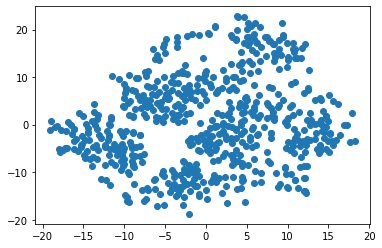

In [80]:
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [81]:
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(myopia_pca)
    inertia.append(kmeans.inertia_)

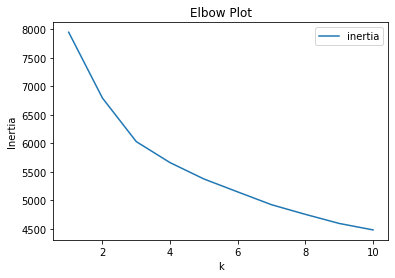

In [82]:
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

**Sample Analysis**

According to the explained variance, the first principal component contains approximately `20%` of the variance and the second principal component contains `15%` of the variance. We have approximately `35%` of the information in the original dataset, and we will see whether increasing the number of principal components to 3 will increase the explained variance.

Both the t-SNE and an elbow plot using k-means suggest that there may be between 2 and 5 meaningful clusters

## Finding the best value for _k_ using the Elbow Curve

In [83]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


* Create a function called `get_clusters(k, data)` that finds the `k` clusters using K-Means on `data`. The function should return a DataFrame copy of `Data` that should include a new column containing the clusters found.

In [84]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

* Create a 2D-Scatter plot to analyze the clusters using `x="AGE"` and `y="VCD"`.

**Analyzing Clusters with the Best Value of `k`**

In [85]:
clusters = get_clusters(5, df_myopia)
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,3
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,4


In [86]:
def show_clusters(df):
    plt.scatter(df['AGE'], df['VCD'], c=df['class'])
    plt.xlabel('AGE')
    plt.ylabel('VCD')
    plt.show()

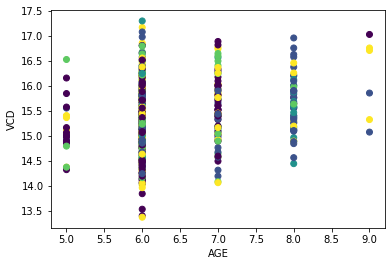

In [87]:
show_clusters(clusters)

Myopia Clusters Findings

After Preparing the Data, Applying Dimensional Reduction using PCA and reducing this further with t-SNE I performed a Cluster Analysis with K-Means model. Among my finding included the following:

The optimal number of clusters seems to be 3

t-SNE was not helpful in finding clusters, there was some some difference after adjusting perplexity but this could be due to random noise.

Some patterns after performing the K-Means clustering but the dataset is too small to make an accurate prediction or for further splitting and training of data.

My recommendation is to get a bigger dataset and to split the data into Test and Training to test the above models and others to be able to make more accurate predictions and clustering.

